In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from optimizer.edm_sa_ilp import edm_sa_ilp

SA_ILP runtime = 0.34716200828552246
ILP runtime = 0.3366258144378662


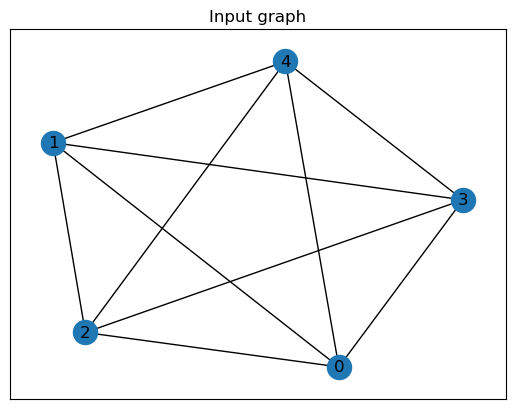

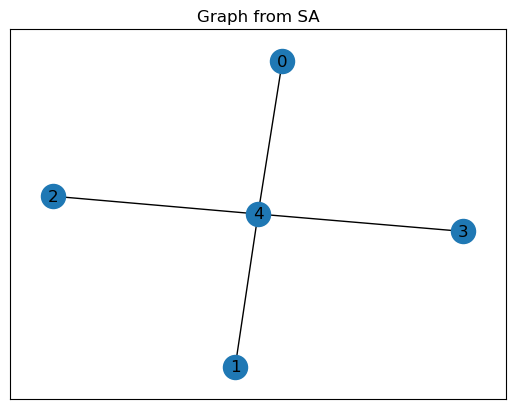

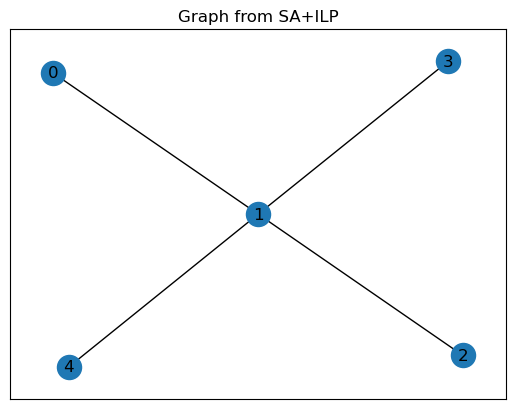

In [2]:
kmax = 100
temperature = 100
G = nx.complete_graph(5)
output = edm_sa_ilp(G, kmax, temperature)

gout_sailp = output[0]
gout_sa = output[1]
sailp_runtime = output[4]
ilp_runtime = output[5]

print("SA_ILP runtime =", sailp_runtime)
print("ILP runtime =", ilp_runtime)

plt.figure()
plt.title("Input graph")
nx.draw_networkx(G)
plt.draw()
plt.show(block=False)

plt.figure()
plt.title("Graph from SA")
nx.draw_networkx(gout_sa)
plt.draw()
plt.show(block=False)


plt.figure()
plt.title("Graph from SA+ILP")
nx.draw_networkx(gout_sailp)
plt.draw()
plt.show(block=False)


SA_ILP runtime = 0.3342878818511963
ILP runtime = 0.3153049945831299


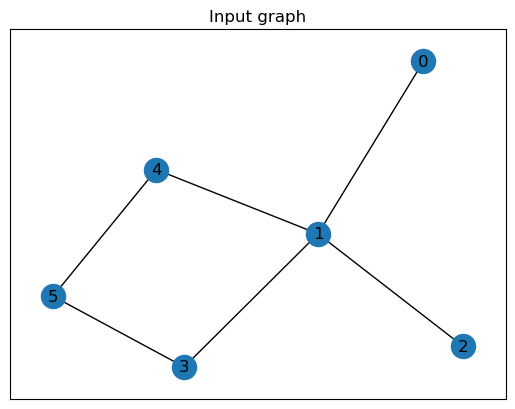

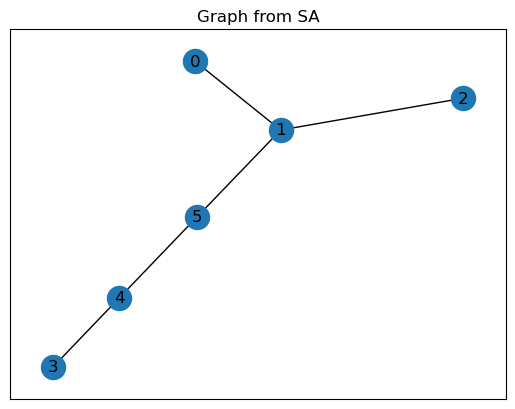

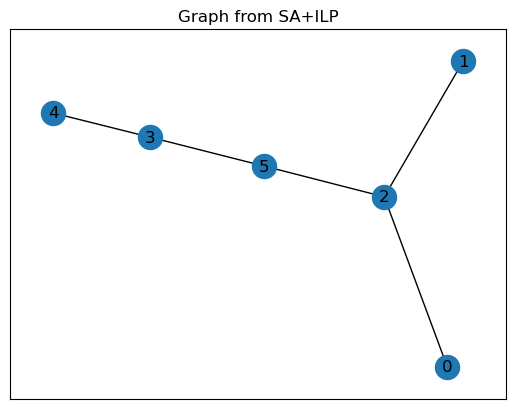

In [5]:
kmax = 100
temperature = 100
prob_of_edge_inclusion = 0.6
G = nx.erdos_renyi_graph(6, prob_of_edge_inclusion)
output = edm_sa_ilp(G, kmax, temperature)

gout_sailp = output[0]
gout_sa = output[1]
sailp_runtime = output[4]
ilp_runtime = output[5]

print("SA_ILP runtime =", sailp_runtime)
print("ILP runtime =", ilp_runtime)

plt.figure()
plt.title("Input graph")
nx.draw_networkx(G)
plt.draw()
plt.show(block=False)

plt.figure()
plt.title("Graph from SA")
nx.draw_networkx(gout_sa)
plt.draw()
plt.show(block=False)


plt.figure()
plt.title("Graph from SA+ILP")
nx.draw_networkx(gout_sailp)
plt.draw()
plt.show(block=False)
